In [1]:
from __future__ import print_function

import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../MNIST-data", False, one_hot=True)

/opt/Anaconda/envs/tensorflow1.5/lib/python3.5/site-packages/scipy/__init__.py:144: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.13.1)
  UserWarning)


Extracting ../MNIST-data/train-images-idx3-ubyte.gz
Extracting ../MNIST-data/train-labels-idx1-ubyte.gz
Extracting ../MNIST-data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST-data/t10k-labels-idx1-ubyte.gz


In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_epoch = 1
logs_path = '/tmp/tensorflow_logs/example/'

# tf Graph Input
# mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition => 10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

In [3]:
# Construct model and encapsulating all ops into scopes, making
# Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
    
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
    
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)

# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", acc)

# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

In [4]:
# Start Training
with tf.Session() as sess:
    sess.run(init)

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            # 运行哪些就返回哪些
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            
            # Write logs at every iteration
            # 第二个参数是训练的步数
            summary_writer.add_summary(summary, epoch * total_batch + i)
            
            # Compute average loss
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if (epoch + 1) % display_epoch == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 1.183183373
Epoch: 0002 cost= 0.664999479
Epoch: 0003 cost= 0.552689707
Epoch: 0004 cost= 0.498619281
Epoch: 0005 cost= 0.465473853
Epoch: 0006 cost= 0.442494841
Epoch: 0007 cost= 0.425494029
Epoch: 0008 cost= 0.412208776
Epoch: 0009 cost= 0.401356832
Epoch: 0010 cost= 0.392386847
Epoch: 0011 cost= 0.384755821
Epoch: 0012 cost= 0.378193521
Epoch: 0013 cost= 0.372425700
Epoch: 0014 cost= 0.367296835
Epoch: 0015 cost= 0.362739461
Epoch: 0016 cost= 0.358611675
Epoch: 0017 cost= 0.354821197
Epoch: 0018 cost= 0.351391390
Epoch: 0019 cost= 0.348297496
Epoch: 0020 cost= 0.345432600
Epoch: 0021 cost= 0.342749892
Epoch: 0022 cost= 0.340232516
Epoch: 0023 cost= 0.337909071
Epoch: 0024 cost= 0.335733549
Epoch: 0025 cost= 0.333703307
Optimization Finished!
Accuracy: 0.9137


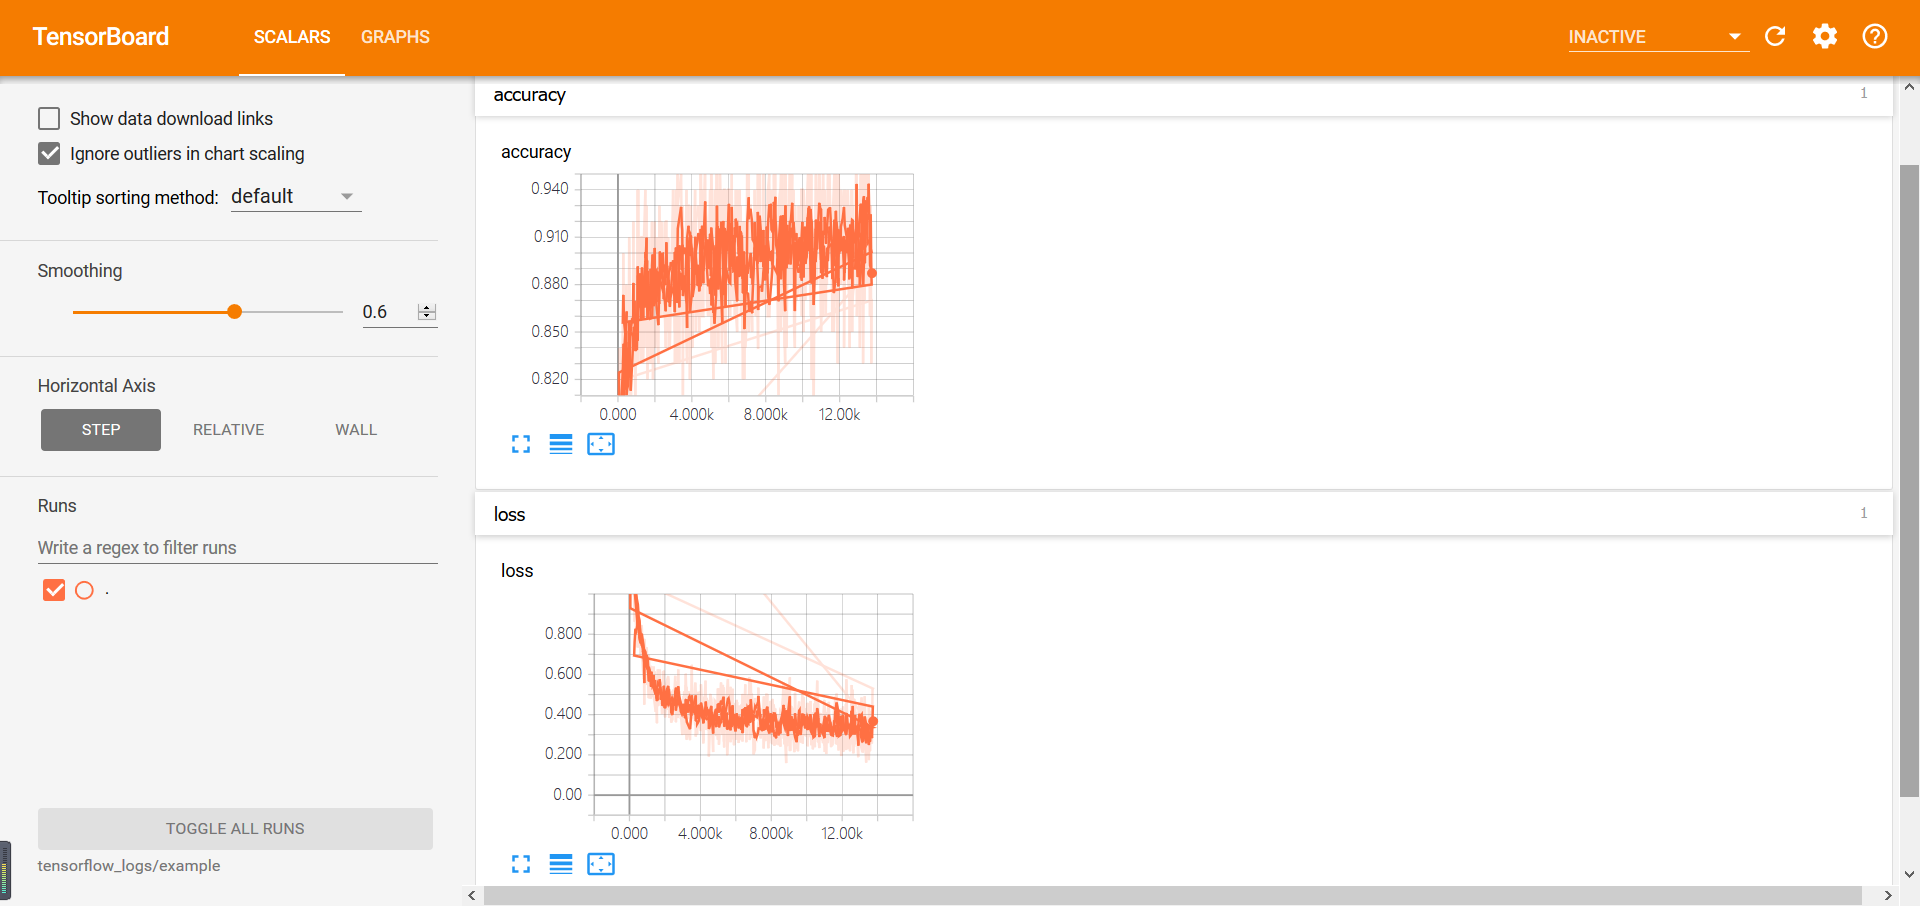

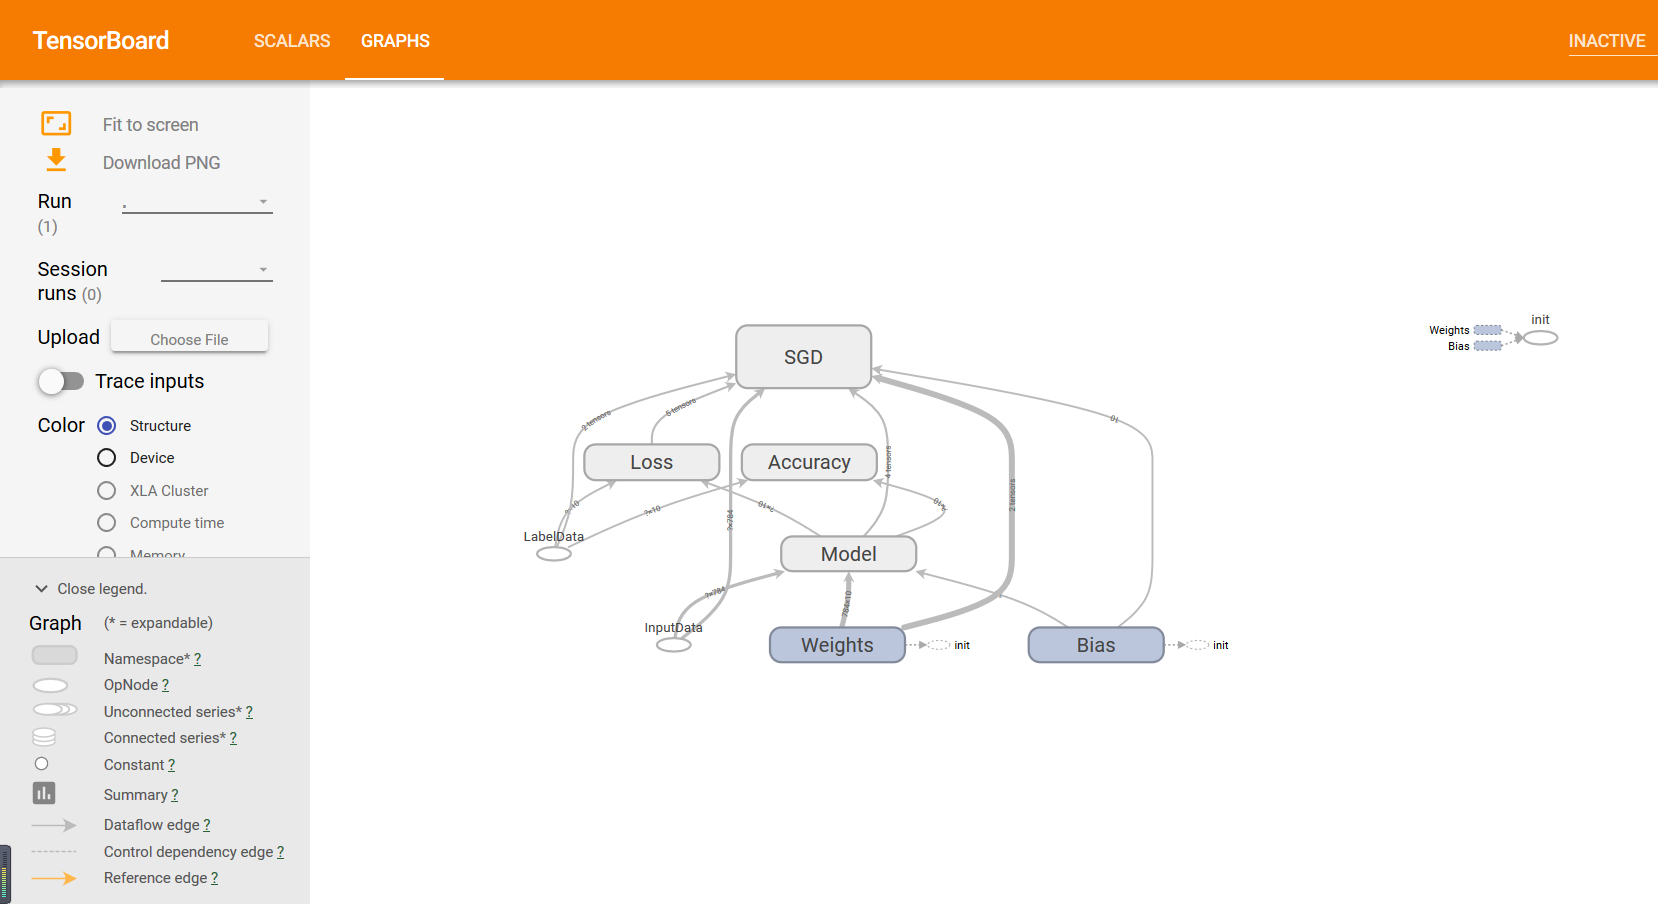